In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_paths = glob(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\cifar\train\*.png')
data_paths[0]

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\0_frog.png'

In [7]:
path = data_paths[0]
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\0_frog.png'

In [8]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [9]:
image.shape

TensorShape([32, 32, 3])

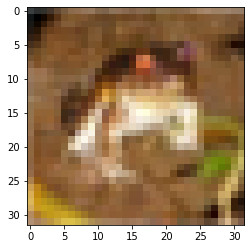

In [10]:
plt.imshow(image)
plt.show()

# tf.data

In [11]:
train_paths = glob(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\cifar\train\*.png')
train_paths[:10]

['C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\0_frog.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10000_automobile.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10001_frog.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10002_frog.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10003_ship.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10004_ship.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10005_cat.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10006_deer.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10007_frog.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\10008_airplane.png']

In [12]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [23]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image, num_parallel_calls=AUTOTUNE)

In [24]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

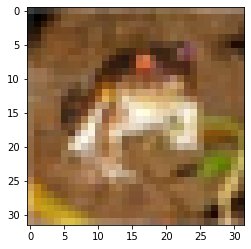

In [25]:
plt.imshow(tf_image)
plt.show()

## Batch로 묶기

In [29]:
batch_size = 8

In [30]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [31]:
tf_images = next(iter(dataset))
tf_images.shape

TensorShape([8, 32, 32, 3])

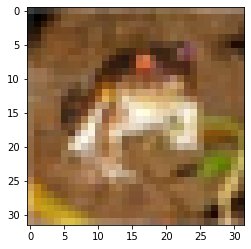

In [32]:
plt.imshow(tf_images[0])
plt.show()

## Shuffle 하기

In [33]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(4)
dataset = dataset.shuffle(buffer_size=len(train_paths))
dataset = dataset.repeat()

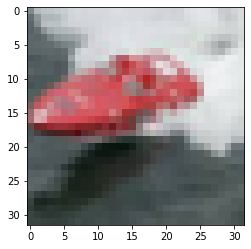

In [35]:
tf_images = next(iter(dataset))
plt.imshow(tf_images[0])
plt.show()

## Label하고 같이 넣기 

In [36]:
path = train_paths[0]
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\0_frog.png'

In [37]:
os.path.basename(path).replace('.png', '').split('_')[-1]

'frog'

In [38]:
def get_label(path):
    return os.path.basename(path).replace('.png', '').split('_')[-1]

In [39]:
path, get_label(path)

('C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\0_frog.png',
 'frog')

In [43]:
train_labels = [get_label(path) for path in train_paths]
train_labels[:5]

['frog', 'automobile', 'frog', 'frog', 'ship']

In [44]:
class_names = np.unique(train_labels)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [45]:
'frog' == class_names

array([False, False, False, False, False, False,  True, False, False,
       False])

In [46]:
onehot_encoding = np.array('frog' == class_names, np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [47]:
def onehot_encoding(label):
    return np.array(label == class_names, np.uint8)

In [48]:
def load_data(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image, label

In [51]:
labels = [onehot_encoding(cls_name) for cls_name in train_labels]
labels[:5]

[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)]

In [52]:
dataset = tf.data.Dataset.from_tensor_slices((train_paths, labels))
dataset = dataset.map(load_data, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(4)
dataset = dataset.shuffle(buffer_size=len(train_paths))
dataset = dataset.repeat()

In [53]:
image, label = next(iter(dataset))

In [56]:
image.shape, label.shape

(TensorShape([4, 32, 32, 3]), TensorShape([4, 10]))

In [57]:
np.array(label[0])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

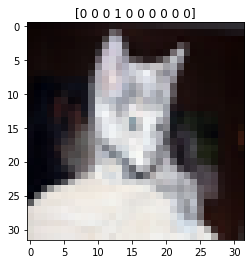

In [61]:
plt.title(np.array(label[0]))
plt.imshow(np.array(image[0]))
plt.show()

tf.py_function()

## tensorflow 함수로 label 얻기

In [62]:
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\cifar\\train\\0_frog.png'

In [63]:
fname = tf.strings.split(path, '_')[-1]
lbl_name = tf.strings.regex_replace(fname, '.png', '')
lbl_name

<tf.Tensor: id=694, shape=(), dtype=string, numpy=b'frog'>

In [65]:
lbl_name == class_names

<tf.Tensor: id=699, shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False,  True, False, False,
       False])>

In [64]:
onehot = tf.cast(lbl_name == class_names, tf.uint8)
onehot

<tf.Tensor: id=697, shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [66]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return onehot

In [67]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    label = get_label(path)
    return image, label

In [68]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(4)
dataset = dataset.shuffle(buffer_size=len(train_paths))
dataset = dataset.repeat()

In [69]:
image, label = next(iter(dataset))

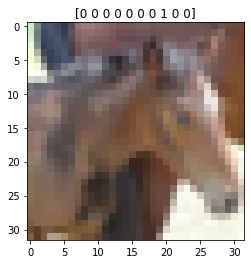

In [70]:
plt.title(np.array(label[0]))
plt.imshow(image[0])
plt.show()